# Homework 2: U.S. Boundary Currents

Name: An Ngo

Date: 02/04/2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [15]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [16]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

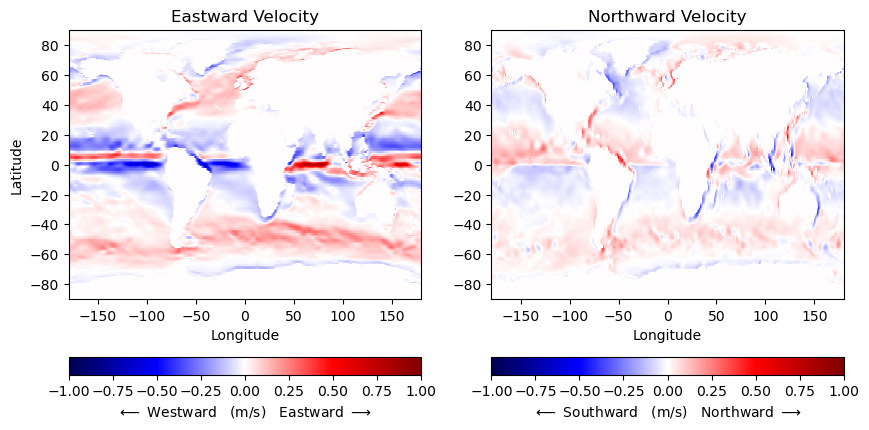

In [17]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1. At 30$^{\circ}$N, the currents on the east coast are moving northeast, and the west coast currents are moving southwest.At 45$^{\circ}$N, the currents on both coasts are travelling southeast.
2. It seems like the east currents flow faster than western currents since the color is darker.
3. These currents are a part of the gyres in the North Atlantic and North Pacific since we can observe rotating clocklike current patterns in the two regions.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [19]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_temperature = xr.open_dataset('THETA_2015_12.nc')

In [20]:
# store the THETA grid into a into numpy array
mtemp = np.array(ds_temperature['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

Text(0.5, 0, 'Longitude')

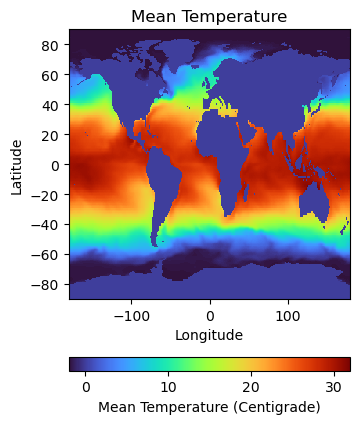

In [25]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,mtemp[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='Mean Temperature (Centigrade)' )
plt.title('Mean Temperature')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The west coast is noticably cooler than the east coast around the same latitudes.
2. The ocean currents play a large role in determining the temperature differences because on the west coast, a southeastern current brings down cold water from higher latitudes down to the coast, while on the east coast, a northwestern current brings in warm water from the equator.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [26]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')

In [27]:
# store the WVELSTAR grid into a into numpy array
vvelo = np.array(ds_wvelstar['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [101]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
vdepth = np.array(ds_wvelstar['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

Text(0.5, 0, 'Longitude')

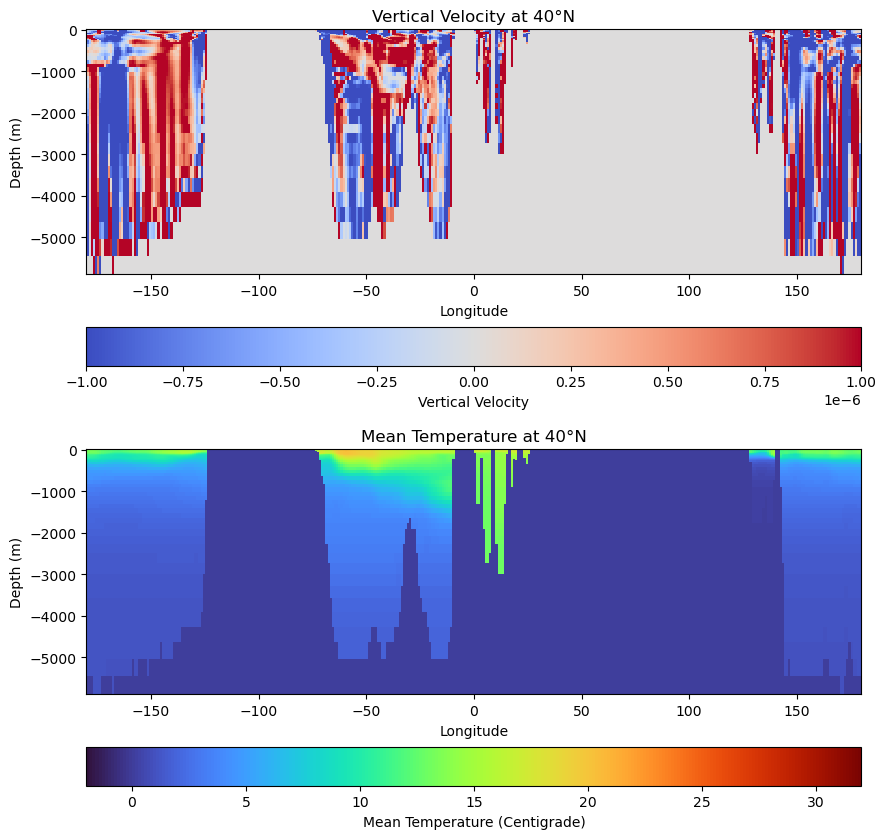

In [102]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
V = plt.pcolormesh(lon,vdepth,vvelo[0,:,259,:], vmin = -0.000001, vmax = 0.000001, cmap='coolwarm')
plt.colorbar(V, orientation='horizontal', label='Vertical Velocity')
plt.title('Vertical Velocity at 40°N')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')


# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(lon,vdepth,mtemp[0, :, 259, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='Mean Temperature (Centigrade)' )
plt.title('Mean Temperature at 40°N')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude')


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. It looks like the vertical velocity in the current on the east coast is faster and more negative (i.e. downward) than on the west coast since the gradient is much darker on the east side. On the west coast, there seems to be a positive velocity upwards right next to the coast, then a negative velocity further out into the ocean.
2. The vertical velocity is much slower than the horizontal velocity, since vertical velocity is caused by slight differences in water density that cause water to slowly sink down or rise. Factors such as temperature and salinity affect the water density. In contrast, the horizontal velocity of water is determined by the Ekman transport and atmospheric circulation.
3. I think that the positive velocity in the western coastline means that saltier and colder water that was previously underneath the surface rises and replaces warmer water that was on top, leading to a lower temperature, while on the east coast, the downward velocity causes warmer waters on top to continue pushing colder water down and allowing warm water from the equator to replace it.
4. Due to the Coriolis effect, winds that blow south create currents that are deflected to the right with respect to the wind's direction of travel (so about southwest-west). This brings down colder air from the north, which cools the surface water. I think what happens is that the wind causes the coastal water to move outwards into the ocean and become cooler, while the subsurface water at the coast rises to replace it, which would explain why there is upwelling right next to the coast and then downwelling as you go further out.